In [40]:

from irrep.bandstructure import BandStructure
  # adjust path if needed to point to the data in the tests fo wannier-berri repository
bandstructure = BandStructure(code='espresso', prefix='QEfiles/GaAs')  
spacegroup = bandstructure.spacegroup
spacegroup.show()



 ---------- CRYSTAL STRUCTURE ---------- 


Cell vectors in angstroms:

      Vectors of DFT cell       |      Vectors of REF. cell      
a0 = -2.8270   0.0000   2.8270  |  a0 = -2.8270   0.0000  -2.8270
a1 =  0.0000   2.8270   2.8270  |  a1 =  0.0000   2.8270   2.8270
a2 = -2.8270   2.8270   0.0000  |  a2 =  2.8270   2.8270   0.0000

Atomic positions in direct coordinates:

Atom type |   Position in DFT cell    |   Position in REF cell   
    1     |  0.0000   0.0000   0.0000 |  0.0000   0.0000   0.0000
    2     |  0.2500   0.2500   0.2500 |  0.2500   0.2500   0.2500


 ---------- SPACE GROUP ----------- 


Space group: F-43m (# 216)
Number of unitary symmetries: 24 (mod. lattice translations)

The transformation from the DFT cell to the reference cell of tables is given by: 
        |   1.0000  0.0000  0.0000 |
refUC = |   0.0000  1.0000  0.0000 |    shiftUC = [0. 0. 0.]
        |   0.0000  0.0000  1.0000 |


 ### 1 

rotation : |  1   0   0 |
           |  0   1   0 |
           

In [41]:
from wannierberri.symmetry.projections import Projection, ProjectionsSet
# now set the transformations of WFs. Make sure, the projections are consistent with the amn file
proj_Ga_sp3 = Projection(position_num = [[0,0,0]], orbital='sp3', spacegroup=spacegroup)
proj_As_sp3 = Projection(position_num = [[1/4,1/4,1/4]], orbital='sp3', spacegroup=spacegroup)
projections_set = ProjectionsSet(projections=[proj_Ga_sp3, proj_As_sp3],)

In [3]:
from wannierberri.symmetry.sawf import SymmetrizerSAWF
symmetrizer = SymmetrizerSAWF().from_irrep(bandstructure)
symmetrizer.set_D_wann_from_projections(projections_set)

mpgrid = [4 4 4], 64
 [[-0.08360829+0.33901891j]] 
 symm_matrix: block 25:26 of 26
 [[-0.83278342+0.j]] 
 symm_matrix: block 25:26 of 26
 [[-0.08360829-0.33901891j]] 
 symm_matrix: block 25:26 of 26
 [[-0.15459725-2.08166817e-17j]] 
 symm_matrix: block 25:26 of 26
 [[0.93201887+1.11022302e-16j]] 
 symm_matrix: block 25:26 of 26
 [[-0.01261933+0.j]] 
 symm_matrix: block 25:26 of 26
 [[-0.76480229-5.55111512e-17j]] 
 symm_matrix: block 25:26 of 26
 [[0.1837837-0.22774516j]] 
 symm_matrix: block 25:26 of 26
 [[0.78199082+2.77555756e-17j]] 
 symm_matrix: block 25:26 of 26
 [[-0.47208419+0.46909177j]] 
 symm_matrix: block 25:26 of 26
 [[-0.49369034-0.24134661j]] 
 symm_matrix: block 25:26 of 26
 [[0.66462688-0.11127375j]] 
 symm_matrix: block 25:26 of 26
 [[0.20538985-1.21430643e-17j]] 
 symm_matrix: block 25:26 of 26
 [[-0.37632639-0.13007286j]] 
 symm_matrix: block 25:26 of 26
 [[-0.49369034+0.24134661j]] 
 symm_matrix: block 25:26 of 26
 [[0.1837837+0.22774516j]] 
 symm_matrix: block 25:

In [42]:
from wannierberri.w90files.amn import amn_from_bandstructure
amn = amn_from_bandstructure(bandstructure=bandstructure, projections=projections_set)

finding num points from 2 projections
Creating amn. Using projections_set 
ProjectionsSet with 8 Wannier functions and 0 free variables
Projection 0, 0, 0:['sp3'] with 4 Wannier functions on 1 points (4 per site)
Projection 0.25, 0.25, 0.25:['sp3'] with 4 Wannier functions on 1 points (4 per site)


/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/symmetry/orbitals.py:256: RuntimeWarning: invalid value encountered in divide
  g_costheta = gk[:, 2] / gk_abs


In [43]:
from wannierberri.w90files import Wannier90data
w90data=Wannier90data(seedname="QEfiles/GaAs", readfiles=["mmn","eig","win", "unk"] )
# check the symmetries of the amn and eig files
w90data.set_symmetrizer(symmetrizer)
w90data.set_file("amn", amn)
for ib, band in enumerate(w90data.eig.data.T):
    print(f"Band {ib}: minimum energy = {band.min()} eV, maximum energy = {band.max()} eV")

kwargs for mmn are {'read_npz': True, 'write_npz': True}
calling w90 file with QEfiles/GaAs, mmn, tags=['data', 'neighbours', 'G'], read_npz=True, write_npz=True, kwargs={'npar': 32}
kwargs for eig are {'read_npz': True, 'write_npz': True}
calling w90 file with QEfiles/GaAs, eig, tags=['data'], read_npz=True, write_npz=True, kwargs={}
kwargs for win are {}
kwargs for unk are {}
calling w90 file with QEfiles/GaAs, , tags=['data'], read_npz=True, write_npz=True, kwargs={}
NK is not provided, reading all UNK until one is missing
QEfiles/UNK00065.1 not found, stopping reading UNK files, read 64 files
NK=64
saving to QEfiles/GaAs..npz : 
creating empty CheckPoint from Win file
kwargs for amn are {'read_npz': True, 'write_npz': True}
Band 0: minimum energy = -26.681294633076 eV, maximum energy = -26.675440324952 eV
Band 1: minimum energy = -26.680132607603 eV, maximum energy = -26.675440278077 eV
Band 2: minimum energy = -26.680132576334 eV, maximum energy = -26.675440278077 eV
Band 3: minim

In [44]:
# w90data.select_bands(win_min=-6,win_max= 100)
froz_max = 15
w90data.wannierise( init = "amn",
                froz_min=-6,
                froz_max=froz_max,
                print_progress_every=1,
                num_iter=101,
                conv_tol=1e-6,
                mix_ratio_z=1.0,
                localise=True,
                sitesym=True,
                )

/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/wannierise/wannierizer.py:230: UserWarning: Ray is not initialized, running in serial mode
  warnings.warn("Ray is not initialized, running in serial mode")


####################################################################################################
starting WFs
----------------------------------------------------------------------------------------------------
wannier centers and spreads
----------------------------------------------------------------------------------------------------
  0.239436000000    0.239436000000    0.239436000000   |     6.873659832136
  0.239436000000   -0.239436000000   -0.239436000000   |     6.873659832136
 -0.239436000000    0.239436000000   -0.239436000000   |     6.873659832136
 -0.239436000000   -0.239436000000    0.239436000000   |     6.873659832136
 -1.260734000000    1.566266000000    1.566266000000   |     3.773384874784
 -1.260734000000    1.260734000000    1.260734000000   |     3.773384874784
 -1.566266000000    1.566266000000    1.260734000000   |     3.773384874784
 -1.566266000000    1.260734000000    1.566266000000   |     3.773384874784
------------------------------------------------

In [45]:
from wannierberri.system import System_w90
system = System_w90(w90data=w90data, berry=True)

setting Rvec
expjphase1 (1, 8, 8)
Real-space lattice:
 [[-2.82700013  0.          2.82700013]
 [ 0.          2.82700013  2.82700013]
 [-2.82700013  2.82700013  0.        ]]
Number of wannier functions: 8
Number of R points: 123
Recommended size of FFT grid [4 4 4]


In [46]:
# all kpoints given in reduced coordinates
import wannierberri as wberri
path=wberri.Path(system,
                nodes=[
                    [0.50000,  0.50000, 0.5000],  # L 
                    [0.00000,  0.00000, 0.0000],  # G 
                    [0.50000, -0.50000, 0.0000],  # X 
                    [0.37500, -0.37500, 0.0000],  # K 
                    [0.00000,  0.00000, 0.0000],  # G 
                        ] , #
                labels=['L', 'G', 'X', 'K', 'G'],
                length=200 )   # length [ Ang] ~= 2*pi/dk

bands_path=wberri.evaluate_k_path(system,
                path=path,)

Starting run()
Using the follwing calculators : 
############################################################

 'tabulate'  :  <wannierberri.calculators.tabulate.TabulatorAll object at 0x7a06d16c6240>  : 
    TabulatorAll - a pack of all k-resolved calculators (Tabulators)
    
 Includes the following tabulators : 
--------------------------------------------------
 "Energy" : <wannierberri.calculators.tabulate.Energy object at 0x7a073757ac30> : calculator not described

--------------------------------------------------

############################################################
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.tabulate.TabulatorAll object at 0x7a06d16c6240>
All calculators are compatible
Symmetrization switched off for Path
Grid is regular
The set of k points is a Path() with 133 points and labels {0: 'L', 31: 'G', 81: 'X', 94: 'K', 132: 'G'}
generating K_list
Done 
Done, sum of weights:133.0
processing 133 K point

/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/grid/path.py:163: UserWarning: symmetry is not used for a tabulation along path
  warnings.warn("symmetry is not used for a tabulation along path")


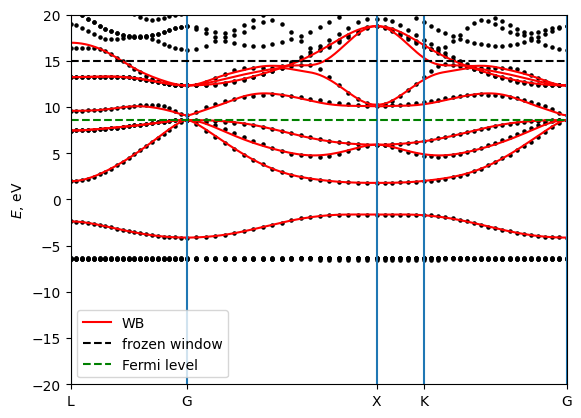

In [47]:
# plot the bands and compare with pw
# EF = 12
import numpy as np
import scipy
import matplotlib.pyplot as plt

A = np.loadtxt("./QEfiles/GaAs.bands_pw.dat.gnu")
bohr_ang = scipy.constants.physical_constants['Bohr radius'][0] / 1e-10
alatt = 10.684511508634104 * bohr_ang  # lattice constant in Angstrom
A[:,0]*= 2*np.pi/alatt
A[:,1] = A[:,1]
plt.scatter(A[:,0], A[:,1], c="black", s=5)



bands_path.plot_path_fat(path,
                quantity=None,
                # save_file="Fe_bands.pdf",
                Eshift=0,
                Emin=-100, Emax=50,
                iband=None,
                mode="fatband",
                fatfactor=20,
                cut_k=False,
                linecolor="red",
                close_fig=False,
                show_fig=False,
                label=f"WB"
                )

plt.ylim(-20,20)

plt.hlines(froz_max, 0, A[-1,0], linestyles="dashed", label="frozen window", color="black")
plt.hlines(8.597, 0, A[-1,0], linestyles="dashed", label="Fermi level", color="green")
plt.legend()
plt.savefig("Fe_bands.pdf")

In [48]:
# For this you need the "UNK files (not included in repository because of size)
w90data.plotWF(sc_min=-2, sc_max=2,)

self.unk.grid_size=(np.int32(6), np.int32(6), np.int32(6))
reduc_r_points = [1 1 1]
wannier function 0 : Im/Re ratio 0.1568917897287666 ((0.18255170724991832+7.382067612973975e-18j))
wannier function 1 : Im/Re ratio 0.15187711472594037 ((0.18103580269987196+3.3587069547785226e-19j))
wannier function 2 : Im/Re ratio 0.15690853785219477 ((0.18255292181125252+1.2744754051853896e-18j))
wannier function 3 : Im/Re ratio 0.1569250275959094 ((0.18255403932656986+1.0462462026347429e-17j))
wannier function 4 : Im/Re ratio 0.16182895579623874 ((0.24443330609938504+9.071659962374834e-18j))
wannier function 5 : Im/Re ratio 0.16475025250962894 ((0.23581853255045393-4.673803882068544e-18j))
wannier function 6 : Im/Re ratio 0.16183045454550699 ((0.24443253630546227+7.41618337709643e-18j))
wannier function 7 : Im/Re ratio 0.16183116352604973 ((0.2444330057027531+2.455024707328524e-18j))


(array([ 11.30800051, -11.30800051, -11.30800051]),
 array([[-11.30800051,   0.        ,  11.30800051],
        [  0.        ,  11.30800051,  11.30800051],
        [-11.30800051,  11.30800051,   0.        ]]),
 array([[[[ 1.61350614e-04+4.29888936e-05j,
           -8.57552546e-06+4.54569652e-04j,
           -4.78682203e-04+3.49344839e-04j, ...,
           -2.02605916e-04+2.43880875e-04j,
           -3.19341634e-04+3.30214098e-04j,
            3.01504516e-05-1.58573664e-04j],
          [ 3.33354863e-04-7.40306146e-04j,
           -4.71397917e-04-2.78130767e-04j,
           -1.05301276e-03-2.09436134e-04j, ...,
           -7.08892062e-04+7.37990257e-04j,
           -2.33361829e-04-7.25139167e-05j,
            3.73077615e-04-1.04164207e-03j],
          [ 5.02498437e-04-7.11047373e-04j,
           -6.11991839e-04+2.94838699e-04j,
           -1.13287573e-03+5.66732383e-04j, ...,
           -5.30100777e-04+2.01067808e-04j,
            6.00193468e-04-8.79542829e-04j,
            1.08176069e-0

In [24]:
%ls QEfiles

As.upf                 GaAs.WF0007.xsf  UNK00009.1  UNK00029.1  UNK00049.1
bands.in               GaAs.win         UNK00010.1  UNK00030.1  UNK00050.1
bands.out              GaAs.wout        UNK00011.1  UNK00031.1  UNK00051.1
bandsx.in              GaAs.xml         UNK00012.1  UNK00032.1  UNK00052.1
GaAs.bands_pw.dat      Ga.upf           UNK00013.1  UNK00033.1  UNK00053.1
GaAs.bands_pw.dat.gnu  nscf.in          UNK00014.1  UNK00034.1  UNK00054.1
GaAs.eig               nscf.out         UNK00015.1  UNK00035.1  UNK00055.1
GaAs.eig.npz           paw/             UNK00016.1  UNK00036.1  UNK00056.1
GaAs.mmn               pw2wan.in        UNK00017.1  UNK00037.1  UNK00057.1
GaAs.mmn.npz           scf.in           UNK00018.1  UNK00038.1  UNK00058.1
GaAs.nnkp              scf.out          UNK00019.1  UNK00039.1  UNK00059.1
GaAs..npz              temp/            UNK00020.1  UNK00040.1  UNK00060.1
GaAs.save/             UNK00001.1       UNK00021.1  UNK00041.1  UNK00061.1
GaAs.WF0000.xsf        UN

In [38]:
calculators = {}

calculators["shift_current"] = wberri.calculators.dynamic.ShiftCurrent(sc_eta=0.1,
        Efermi=np.array([9]),
        omega=np.arange(0, 8, 0.1),
        smr_fixed_width=0.2,
        smr_type='Gaussian',
        kBT=0.01,
    )

grid = wberri.Grid(system, length=100)
result = wberri.run(system, grid, calculators=calculators)


Minimal symmetric FFT grid :  [4 4 4]
Starting run()
Using the follwing calculators : 
############################################################

 'shift_current'  :  <wannierberri.calculators.dynamic.ShiftCurrent object at 0x7a06cfd8ae40>  : calculator not described
############################################################
Calculation on  grid - checking calculators for compatibility
shift_current <wannierberri.calculators.dynamic.ShiftCurrent object at 0x7a06cfd8ae40>
All calculators are compatible
Grid is regular
The set of k points is a Grid() with NKdiv=[8 8 8], NKFFT=[4 4 4], NKtot=[32 32 32]
generating K_list
Done in 0.0014307498931884766 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.014046669006347656 s 
K_list contains 43 Irreducible points(8.4%) out of initial 8x8x8=512 grid
Done, sum of weights:1.0
processing 43 K points : in serial.
# K-points calculated  Wall time (sec)  Est. remaining (sec)


/home/stepan/anaconda3/envs/wbvenv/lib/python3.12/site-packages/wannierberri/grid/grid.py:223: UserWarning:  the requested k-grid [31 31 31] was adjusted to [32 32 32]. 
  warnings.warn(f" the requested k-grid {NK} was adjusted to {NKFFT * NKdiv}. ")


time for processing     43 K-points in serial:     3.4968 ; per K-point          0.0813 ; proc-sec per K-point          0.0813
time1 =  0.000827789306640625
Totally processed 43 K-points 
run() finished


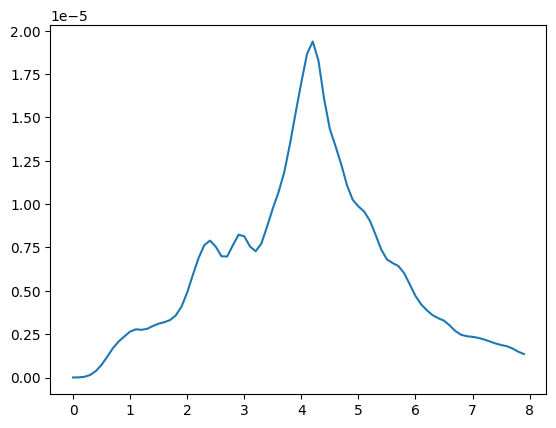

In [39]:
x = result.results['shift_current'].Energies[1]
y = result.results['shift_current'].data[0, :, 0, 1, 2,].real
plt.plot(x, y, label='shift current')

Compare to the figure in paper by Julen https://journals.aps.org/prb/abstract/10.1103/PhysRevB.97.245143#f3


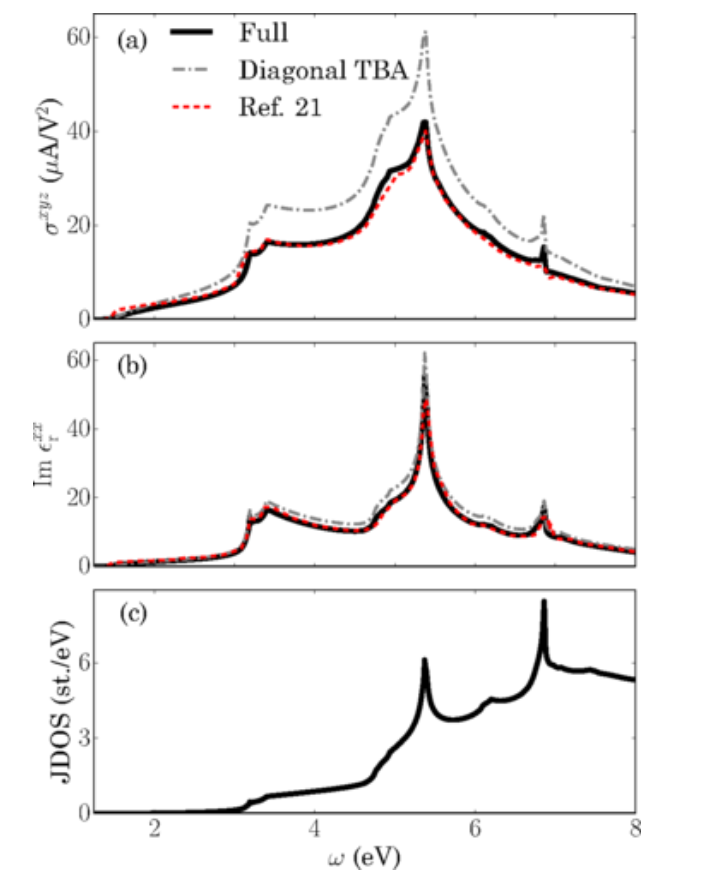